<a href="https://colab.research.google.com/github/Manash-Christ/ML-LABS/blob/main/2348528_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

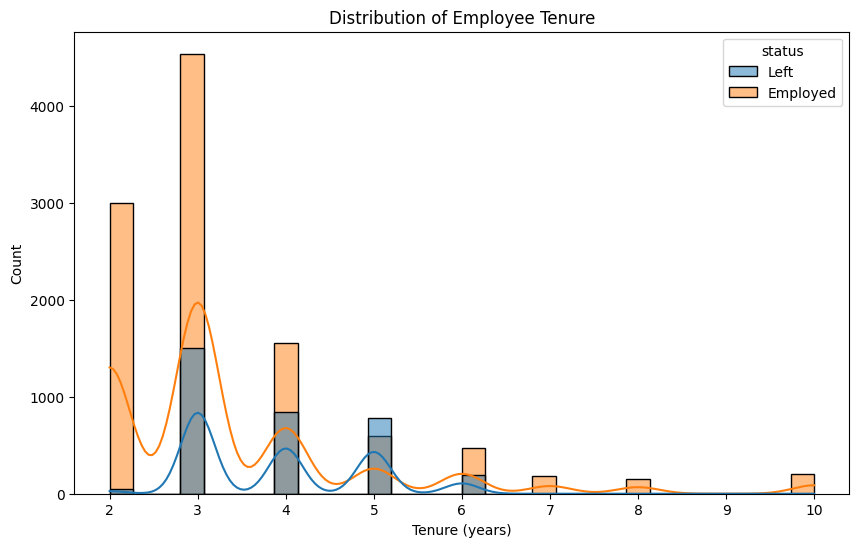

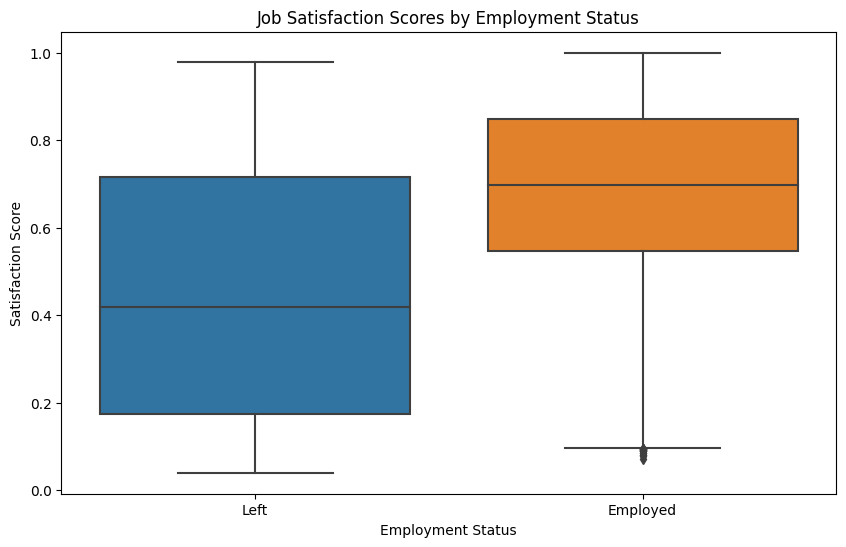

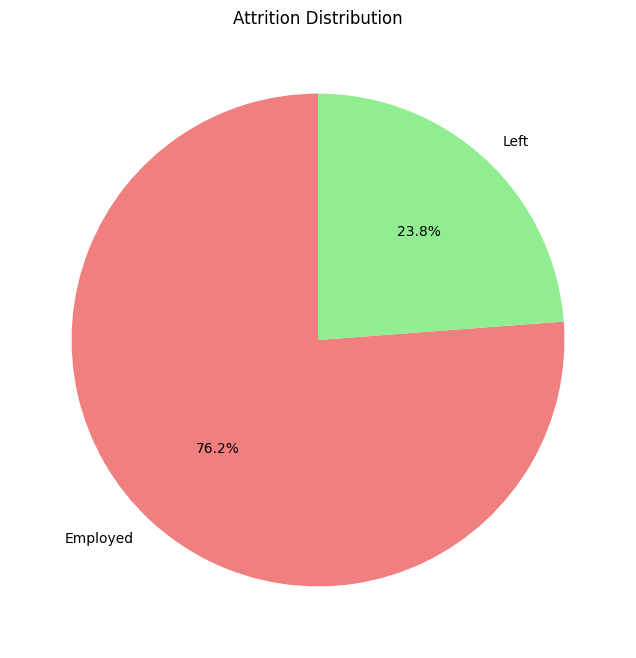

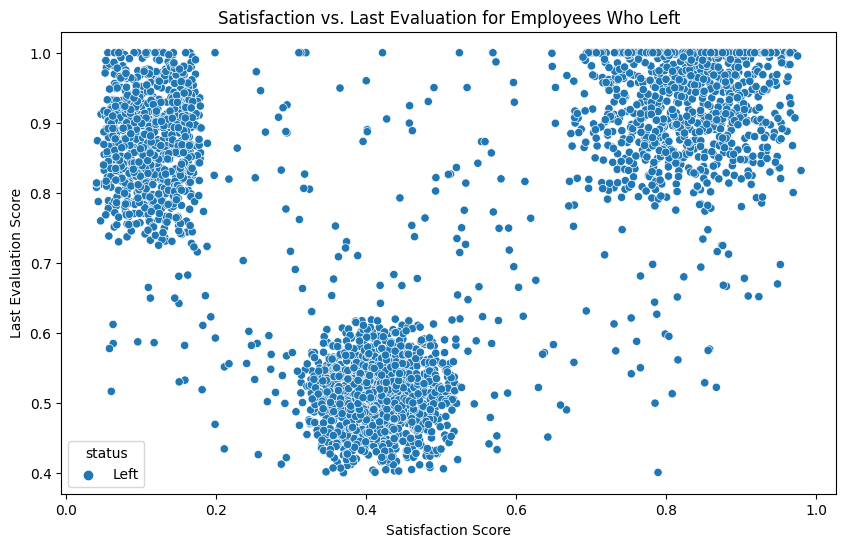

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("empd.csv")

# Histogram of employee tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tenure', hue='status', kde=True, bins=30)
plt.title('Distribution of Employee Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.show()

# Boxplot of job satisfaction scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='satisfaction', data=data)
plt.title('Job Satisfaction Scores by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Satisfaction Score')
plt.show()

# Pie chart of attrition distribution
attrition_distribution = data['status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(attrition_distribution, labels=attrition_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Attrition Distribution')
plt.show()

# Scatter plot of satisfaction scores vs. last evaluation scores for employees who left
left_employees = data[data['status'] == 'Left']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left_employees, hue='status')
plt.title('Satisfaction vs. Last Evaluation for Employees Who Left')
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.show()


**Pre Process**

In [5]:
class empattr():
    def __init__(self,*args,**kwargs):
        self.df = pd.read_csv('empd.csv')
        self.cols = self.df.columns.to_list()
        self.continous = [x for x in self.df if str(self.df[x].dtype) == 'float64' and self.df[x].nunique() > 20]
        self.continous2 = [x for x in self.df if str(self.df[x].dtype) == 'float64' and self.df[x].nunique() < 20]
        self.integer = [x for x in self.df if str(self.df[x].dtype) == 'int64']
        self.ordinal = [x for x in self.df if str(self.df[x].dtype) == 'object']
        self.dropcol = [x for x in self.df if self.df[x].isnull().sum() < 1000]

    def catcols(self):
        return self.category

    def floatcols(self):
        return self.float

    def intcols(self):
        return self.integer

    def collist(self):
        return self.cols


df = empattr()
data = df.df
class preprocess(empattr):
    def __init__(self):
        super(preprocess,self).__init__()

    def changedtype(self):
        self.df[self.continous2+self.integer] = self.df[self.continous2+self.integer].astype(int)


    def encode(self):
        self.df[self.ordinal[1]] = self.df[self.ordinal[1]].replace(['low','medium','high'],[1,2,3])
        self.df[self.ordinal[2]] = self.df[self.ordinal[2]].replace(['Left','Employed'],[1,0])
        self.df = pd.get_dummies(self.df,columns=[self.ordinal[0]],dtype=int)

    #drop cols
    def dropna(self):
        self.df[list(set(pre.dropcol+pre.continous2))] = self.df[list(set(pre.dropcol+pre.continous2))].dropna()
        self.df = self.df.dropna()

    #remove/impute null
    def impute_mode(self):
        self.df[self.continous2] = self.df[self.continous2].fillna(0)

    def impute_mean(self):
        for i in self.continous+self.integer:
            self.df[i] = self.df[i].fillna(self.df[i].mean())





pre = preprocess()
pre.impute_mode()
pre.impute_mean()
pre.dropna()
pre.encode()
pre.changedtype()
preprocessed = pre.df
preprocessed

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,department_IT,...,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,department_temp
0,221,0,0.932868,4,0,1,0.829896,1,5,0,...,1,0,0,0,0,0,0,0,0,0
1,232,0,0.718477,3,0,1,0.834544,0,2,0,...,0,0,0,0,0,0,0,0,1,0
2,184,0,0.788830,3,0,2,0.834988,0,3,0,...,0,0,0,0,0,0,0,1,0,0
3,206,0,0.575688,4,0,1,0.424764,0,2,0,...,0,0,0,0,0,0,0,1,0,0
4,249,0,0.845217,3,0,1,0.779043,0,3,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14243,272,0,0.815504,4,0,1,0.693387,0,2,0,...,1,0,0,0,0,0,0,0,0,0
14244,178,0,0.735865,5,0,1,0.263282,0,5,1,...,0,0,0,0,0,0,0,0,0,0
14245,257,0,0.638604,3,0,1,0.868209,0,2,0,...,0,0,0,0,0,0,0,1,0,0
14246,232,1,0.847623,5,0,2,0.898917,1,5,0,...,0,1,0,0,0,0,0,0,0,0


**2. Decision Tree Modeling with Tree Pruning and Split Criteria:**

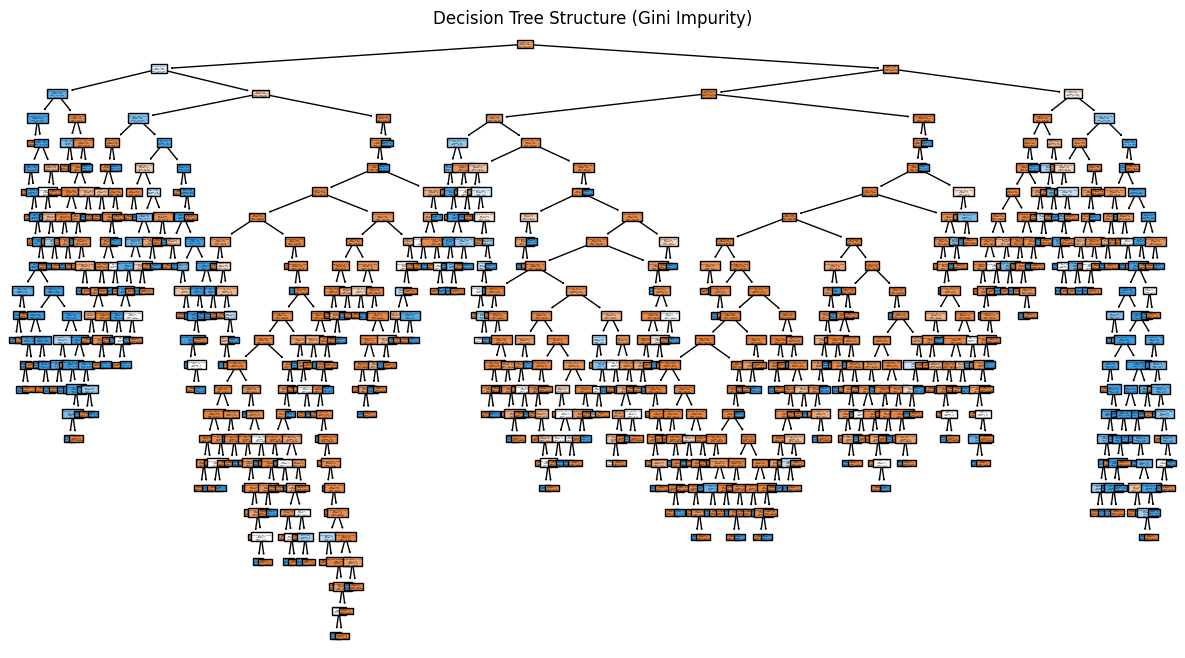

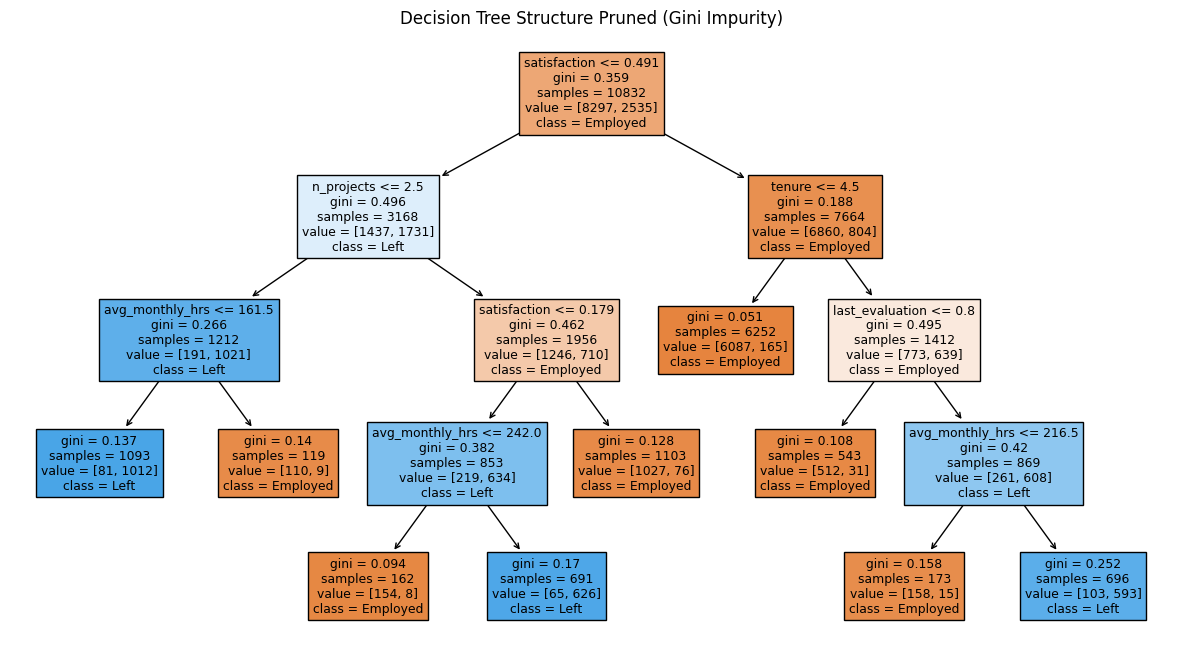

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the dataset into training and testing sets
features = preprocessed.drop('status' , axis=1).columns
X = preprocessed[features]
y = preprocessed['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build decision tree models with Gini impurity and entropy
tree_gini = DecisionTreeClassifier(criterion='gini')
tree_entropy = DecisionTreeClassifier(criterion='entropy')

tree_gini.fit(X_train, y_train)
tree_entropy.fit(X_train, y_train)

# Visualize decision tree structure
plt.figure(figsize=(15, 8))
plot_tree(tree_gini, feature_names=features, class_names=['Employed', 'Left'], filled=True)
plt.title('Decision Tree Structure (Gini Impurity)')
plt.show()

# Prune the trees
# You can experiment with different pruning strategies (e.g., ccp_alpha, max_depth)
# Example: tree_gini_pruned = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.01)
tree_gini_pruned = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.01, max_depth=7, min_samples_leaf=100)
tree_entropy_pruned = DecisionTreeClassifier(criterion='entropy')

tree_gini_pruned.fit(X_train, y_train)
tree_entropy_pruned.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(tree_gini_pruned, feature_names=features, class_names=['Employed', 'Left'], filled=True)
plt.title('Decision Tree Structure Pruned (Gini Impurity)')
plt.show()


**Model Evaluation**

Gini Impurity:
Accuracy: 0.9564, Precision: 0.9632, Recall: 0.9801, F1 Score: 0.9716

Entropy:
Accuracy: 0.9697, Precision: 0.9829, Recall: 0.9772, F1 Score: 0.9800


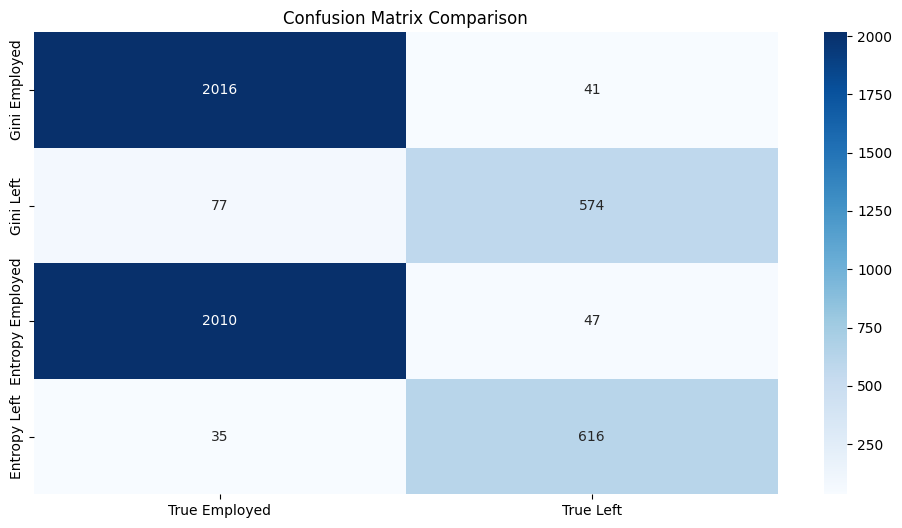

In [29]:
# Evaluate the pruned decision tree models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)

    return accuracy, precision, recall, f1

# Evaluate pruned decision trees
accuracy_gini, precision_gini, recall_gini, f1_gini = evaluate_model(tree_gini_pruned, X_test, y_test)
accuracy_entropy, precision_entropy, recall_entropy, f1_entropy = evaluate_model(tree_entropy_pruned, X_test, y_test)

# Display evaluation metrics
print("Gini Impurity:")
print(f"Accuracy: {accuracy_gini:.4f}, Precision: {precision_gini:.4f}, Recall: {recall_gini:.4f}, F1 Score: {f1_gini:.4f}")

print("\nEntropy:")
print(f"Accuracy: {accuracy_entropy:.4f}, Precision: {precision_entropy:.4f}, Recall: {recall_entropy:.4f}, F1 Score: {f1_entropy:.4f}")

# Confusion matrix
cm_gini = confusion_matrix(y_test, tree_gini_pruned.predict(X_test),)# labels=['Employed', 'Left'])
cm_entropy = confusion_matrix(y_test, tree_entropy_pruned.predict(X_test),)# labels=['Employed', 'Left'])

# Diverging bar chart for confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap([cm_gini[0], cm_gini[1], cm_entropy[0], cm_entropy[1]], annot=True, fmt='d', cmap='Blues',
            xticklabels=['True Employed', 'True Left'], yticklabels=['Gini Employed', 'Gini Left', 'Entropy Employed', 'Entropy Left'])
plt.title('Confusion Matrix Comparison')
plt.show()


**Feature Importance**

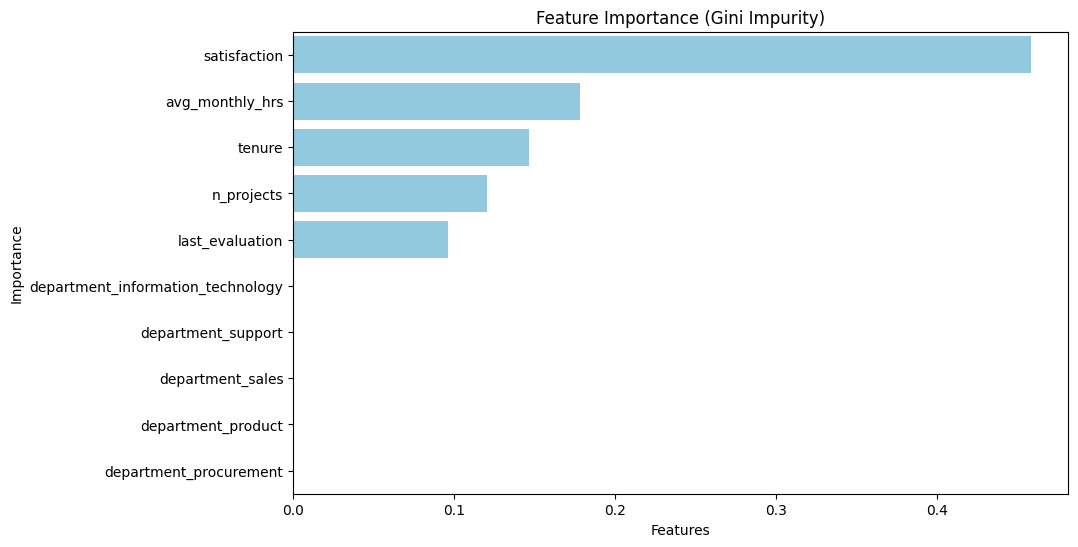

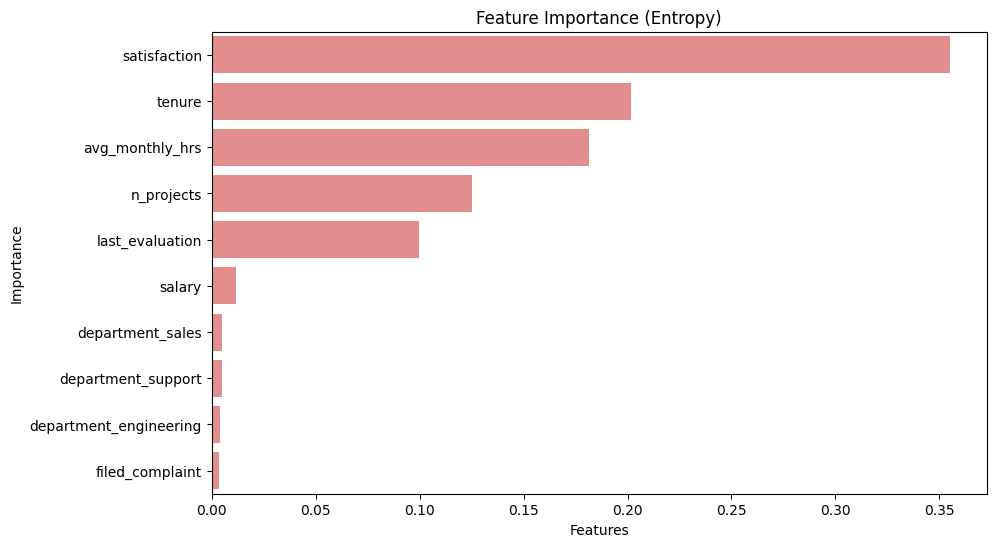

In [30]:
# Feature importance for pruned decision trees
feature_importance_gini = tree_gini_pruned.feature_importances_
feature_importance_entropy = tree_entropy_pruned.feature_importances_

feat_dict_gini = {i:v for i,v in zip(features,feature_importance_gini)}
feat_dict_entropy = {i:v for i,v in zip(features,feature_importance_entropy)}
featimpg = pd.Series(feat_dict_gini.values(),index=feat_dict_gini.keys()).sort_values(ascending=False)
featimpe = pd.Series(feat_dict_entropy.values(),index=feat_dict_entropy.keys()).sort_values(ascending=False)


# Bar chart for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=featimpg[:10], y=featimpg.index[:10], color='skyblue')
plt.title('Feature Importance (Gini Impurity)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=featimpe[:10], y=featimpe.index[:10], color='lightcoral')
plt.title('Feature Importance (Entropy)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
